## Time Series: Climate Data
![climate](https://images.pexels.com/photos/2969/climate-cold-glacier-iceberg.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)
**Objectives:**
- list methods to adjust data for time series
- define the vocabulary of lagging, moving averages, and differencing
- replicate the process in google sheets and in python

**Question**: What are numbers we'd want to model over time?

**Problem:** All our tools aren't natively prepared to handle time series data. We need to make a lot of adjustments to our data. 

### Set up environment and tool set 

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 3] # import 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels

import scipy
from scipy.stats import pearsonr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(statsmodels.__version__)
print(scipy.__version__)

3.0.2
0.23.4
1.16.4
0.9.0
1.1.0


Data obtained from `https://datahub.io/core/global-temp#data`<br>
Looks like original source is obtained from `https://www.ncdc.noaa.gov/cag/global/time-series`

Data are included from the GISS Surface Temperature (GISTEMP) analysis and the global component of Climate at a Glance (GCAG)

### Obtain and visualize data

In [3]:
## data obtained from https://datahub.io/core/global-temp#data
df = pd.read_csv("https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv")
df.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


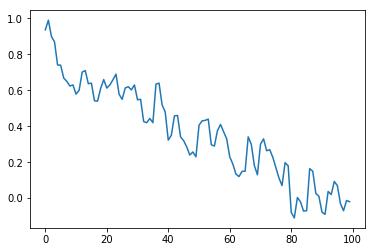

In [4]:
df.Mean[:100].plot()

### Exercise: what is wrong with the data and plot above? How can we fix this?

In [7]:
df = df.pivot(index='Year', columns='Source', values='Mean') # this is the most useful content to use in a daily matter 
df.head()

Source,GCAG,GISTEMP
Year,,
2012,0.6240,0.63
2013,0.6679,0.65
2014,0.7408,0.74
2015,0.8998,0.87
2016,0.9363,0.99


In [67]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

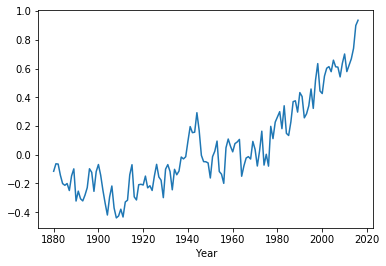

In [9]:
df.GCAG.plot()

In [10]:
type(df.index)

pandas.core.indexes.numeric.Int64Index

### Exercise: how can we make the index more time aware?

In [11]:
df.index = pd.to_datetime(df.index, format='%Y')

In [66]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

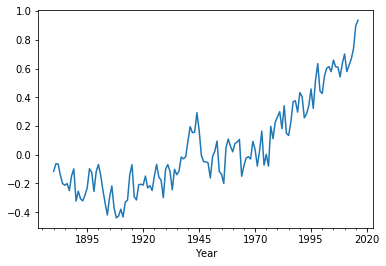

In [14]:
df.GCAG.plot()

In [15]:
df['1880']

Source,GCAG,GISTEMP
Year,,
1880-01-01,-0.1148,-0.2


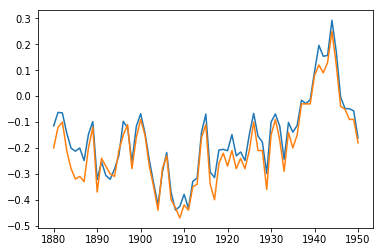

In [16]:
plt.plot(df['1880':'1950'][['GCAG', 'GISTEMP']])

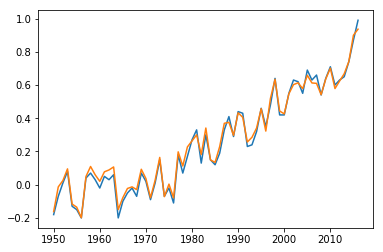

In [21]:
plt.plot(df['1950':][['GISTEMP','GCAG']])

## Logging

`np.log()`

In [22]:
df['GISTEMP_log'] = np.log(df.GISTEMP)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [23]:
df['GCAG_log'] = np.log(df.GCAG)
df.tail(10)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log
Year,,,,
2007-01-01,0.6100,0.66,-0.415515,-0.494296
2008-01-01,0.5419,0.54,-0.616186,-0.612674
2009-01-01,0.6367,0.64,-0.446287,-0.451457
2010-01-01,0.7014,0.71,-0.342490,-0.354677
2011-01-01,0.5788,0.60,-0.510826,-0.546798
2012-01-01,0.6240,0.63,-0.462035,-0.471605
2013-01-01,0.6679,0.65,-0.430783,-0.403617
2014-01-01,0.7408,0.74,-0.301105,-0.300025
2015-01-01,0.8998,0.87,-0.139262,-0.105583


In [93]:
df['1950']

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag12,GISTEMP_lag1,GCAG_diff1,GISTEMP_diff1,GCAG_diff2,GISTEMP_diff2,GCAG_lag2,GCAG_lag3,GCAG_lag4
Year,,,,,,,,,,,,,,
1950-01-01,-0.1616,-0.18,NaN,NaN,-0.0568,0.0248,-0.09,-0.1048,-0.09,-0.0967,-0.09,-0.0487,-0.0477,-0.004


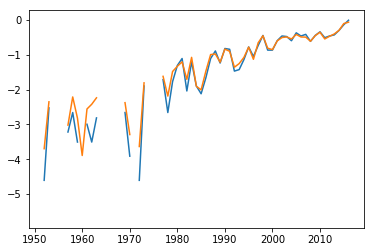

In [25]:
plt.plot(df['1950':][['GISTEMP_log','GCAG_log']])

## Lagging

`shift()` [shift documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)

In [29]:
df['GCAG_lag1'] = df.GCAG.shift() # this will shift the column down one step
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1
Year,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424


In [32]:
df['GCAG_lag12'] = df.GCAG.shift(-2) # this will move the column up two step 
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag12
Year,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,-0.0648
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.1424
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.2009
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.2125
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.2003


In [33]:
# df['GISTEMP_lag1'] = df.GISTEMP.shift()
df['GISTEMP_lag1'] = df.GISTEMP.shift(+1)
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag12,GISTEMP_lag1
Year,,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,-0.0648,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.1424,-0.20
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.2009,-0.12
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.2125,-0.10
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.2003,-0.21



## Differencing

`diff()` [diff documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)

#### First order difference

In [34]:
df['GCAG_diff1']=df.GCAG.diff()
df['GISTEMP_diff1']=df.GISTEMP.diff() # get the difference in rows (row1 - row0)
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag12,GISTEMP_lag1,GCAG_diff1,GISTEMP_diff1
Year,,,,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,-0.0648,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.1424,-0.20,0.0520,0.08
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.2009,-0.12,-0.0020,0.02
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.2125,-0.10,-0.0776,-0.11
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.2003,-0.21,-0.0585,-0.07


#### Second order difference

In [35]:
df['GCAG_diff2']=df.GCAG_diff1.diff()
df['GISTEMP_diff2']=df.GISTEMP_diff1.diff()
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag12,GISTEMP_lag1,GCAG_diff1,GISTEMP_diff1,GCAG_diff2,GISTEMP_diff2
Year,,,,,,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,-0.0648,NaN,NaN,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.1424,-0.20,0.0520,0.08,NaN,NaN
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.2009,-0.12,-0.0020,0.02,-0.0540,-0.06
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.2125,-0.10,-0.0776,-0.11,-0.0756,-0.13
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.2003,-0.21,-0.0585,-0.07,0.0191,0.04


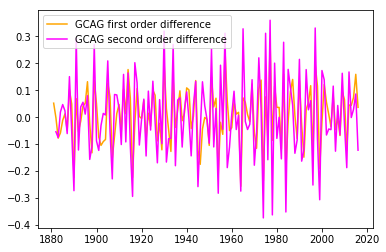

In [36]:
plt.plot(df.index, df.GCAG_diff1, label='GCAG first order difference', color='orange')
plt.plot(df.index, df.GCAG_diff2, label='GCAG second order difference', color='magenta')
plt.legend(loc='upper left')
plt.show()

## Moving Average

![img](img/MA.png)

`rolling()`  [rolling here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

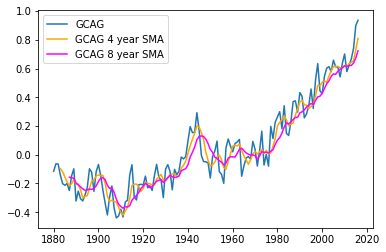

In [37]:
rolling_mean = df.GCAG.rolling(window=4).mean()
rolling_mean2 = df.GCAG.rolling(window=8).mean()
plt.plot(df.index, df.GCAG, label = 'GCAG')
plt.plot(df.index, rolling_mean, label='GCAG 4 year SMA', color='orange')
plt.plot(df.index, rolling_mean2, label='GCAG 8 year SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

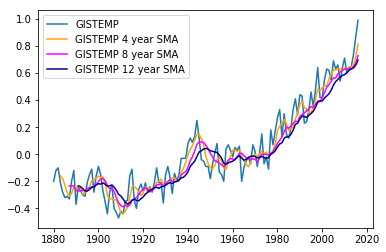

In [38]:
rolling_mean = df.GISTEMP.rolling(window=4).mean()
rolling_mean2 = df.GISTEMP.rolling(window=8).mean()
rolling_mean3 = df.GISTEMP.rolling(window=12).mean()
plt.plot(df.index, df.GISTEMP, label = 'GISTEMP')
plt.plot(df.index, rolling_mean, label='GISTEMP 4 year SMA', color='orange')
plt.plot(df.index, rolling_mean2, label='GISTEMP 8 year SMA', color='magenta')
plt.plot(df.index, rolling_mean3, label='GISTEMP 12 year SMA', color='darkblue')
plt.legend(loc='upper left')
plt.show()

### Exercise: How strongly do these measurements correlate contemporaneously? What about with a time lag?

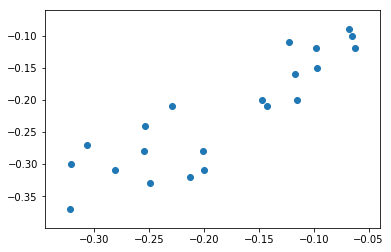

In [39]:
plt.scatter(df['1880':'1900'][['GCAG']], df['1880':'1900'][['GISTEMP']])

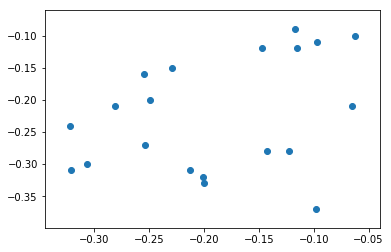

In [40]:
plt.scatter(df['1880':'1899'][['GCAG']], df['1881':'1900'][['GISTEMP']])

In [41]:
pearsonr(df['1880':'1899'].GCAG, df['1881':'1900'].GISTEMP)

(0.345481359365847, 0.1357146858328232)

In [42]:
df['1880':'1899'][['GCAG']].head()

Source,GCAG
Year,
1880-01-01,-0.1148
1881-01-01,-0.0628
1882-01-01,-0.0648
1883-01-01,-0.1424
1884-01-01,-0.2009


In [43]:
df['1881':'1900'][['GISTEMP']].head()

Source,GISTEMP
Year,
1881-01-01,-0.12
1882-01-01,-0.10
1883-01-01,-0.21
1884-01-01,-0.28
1885-01-01,-0.32


In [44]:
min(df.index)

Timestamp('1880-01-01 00:00:00')

In [45]:
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag12,GISTEMP_lag1,GCAG_diff1,GISTEMP_diff1,GCAG_diff2,GISTEMP_diff2
Year,,,,,,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,-0.0648,NaN,NaN,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.1424,-0.20,0.0520,0.08,NaN,NaN
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.2009,-0.12,-0.0020,0.02,-0.0540,-0.06
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.2125,-0.10,-0.0776,-0.11,-0.0756,-0.13
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.2003,-0.21,-0.0585,-0.07,0.0191,0.04


In [46]:
df['GCAG_lag2'] = df.GCAG.shift(2)
df['GCAG_lag3'] = df.GCAG.shift(3)
df['GCAG_lag4'] = df.GCAG.shift(4)
# df['GCAG_leg5'] = df.GCAG.shift(2)

In [47]:
df.columns

Index(['GCAG', 'GISTEMP', 'GISTEMP_log', 'GCAG_log', 'GCAG_lag1', 'GCAG_lag12',
       'GISTEMP_lag1', 'GCAG_diff1', 'GISTEMP_diff1', 'GCAG_diff2',
       'GISTEMP_diff2', 'GCAG_lag2', 'GCAG_lag3', 'GCAG_lag4'],
      dtype='object', name='Source')

In [48]:
# df_new = 
df[['GCAG','GCAG_lag1', 'GCAG_lag2', 'GCAG_lag3', 'GCAG_lag4']].corr()
# df_new

Source,GCAG,GCAG_lag1,GCAG_lag2,GCAG_lag3,GCAG_lag4
Source,,,,,
GCAG,1.000000,0.946235,0.911005,0.898884,0.898513
GCAG_lag1,0.946235,1.000000,0.942859,0.907034,0.895385
GCAG_lag2,0.911005,0.942859,1.000000,0.940571,0.903916
GCAG_lag3,0.898884,0.907034,0.940571,1.000000,0.938279
GCAG_lag4,0.898513,0.895385,0.903916,0.938279,1.000000


In [49]:
max(df.index)

Timestamp('2016-01-01 00:00:00')

### References:

- [Duke resource on differencing](https://people.duke.edu/~rnau/411diff.htm)
- [Scipy talk on time series](https://www.youtube.com/watch?v=v5ijNXvlC5A)
- [Aileen Nielson book](https://www.oreilly.com/library/view/practical-time-series/9781492041641/)

### Check Objectives


## **Monthly data**

In [50]:
dfm = pd.read_csv('monthly_csv.csv')
dfm.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [92]:
# dfm = dfm.pivot(index='Date', columns='Source', values='Mean')
dfm['1880-01-01 00:00:00']

KeyError: '1880-01-01 00:00:00'

In [102]:
dfm.index = pd.to_datetime(dfm.index, format='%Y') # this convert the indext to datetime index
type(dfm.index)

pandas.core.indexes.datetimes.DatetimeIndex

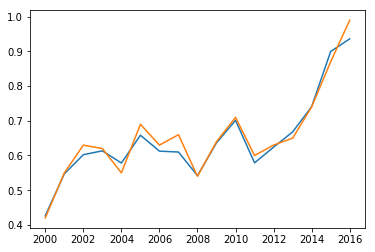

In [105]:
plt.plot(df['2000':][['GCAG', 'GISTEMP']])

In [109]:
# Logging 
dfm['GCAG_log'] = np.log(dfm.GCAG)
dfm['GISTEMP_log'] = np.log(dfm.GISTEMP)
dfm.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Source,GCAG,GISTEMP,GCAG_log,GISTEMP_log
Date,,,,
1880-01-06,0.0009,-0.30,-7.013116,NaN
1880-02-06,-0.1229,-0.21,NaN,NaN
1880-03-06,-0.1357,-0.18,NaN,NaN
1880-04-06,-0.0499,-0.27,NaN,NaN
1880-05-06,-0.0738,-0.14,NaN,NaN


In [110]:
# lagging or shifting a column 
dfm['GCAG_lag'] = dfm.GCAG.shift()
dfm['GISTEMP_lag'] = dfm.GISTEMP.shift()
dfm.head()

Source,GCAG,GISTEMP,GCAG_log,GISTEMP_log,GCAG_lag,GISTEMP_lag
Date,,,,,,
1880-01-06,0.0009,-0.30,-7.013116,NaN,NaN,NaN
1880-02-06,-0.1229,-0.21,NaN,NaN,0.0009,-0.30
1880-03-06,-0.1357,-0.18,NaN,NaN,-0.1229,-0.21
1880-04-06,-0.0499,-0.27,NaN,NaN,-0.1357,-0.18
1880-05-06,-0.0738,-0.14,NaN,NaN,-0.0499,-0.27


In [111]:
# differencing 
dfm['GCAG_diff'] = dfm.GCAG.diff()
dfm['GISTEMP_diff'] = dfm.GISTEMP.diff()
dfm.head()

Source,GCAG,GISTEMP,GCAG_log,GISTEMP_log,GCAG_lag,GISTEMP_lag,GCAG_diff,GISTEMP_diff
Date,,,,,,,,
1880-01-06,0.0009,-0.30,-7.013116,NaN,NaN,NaN,NaN,NaN
1880-02-06,-0.1229,-0.21,NaN,NaN,0.0009,-0.30,-0.1238,0.09
1880-03-06,-0.1357,-0.18,NaN,NaN,-0.1229,-0.21,-0.0128,0.03
1880-04-06,-0.0499,-0.27,NaN,NaN,-0.1357,-0.18,0.0858,-0.09
1880-05-06,-0.0738,-0.14,NaN,NaN,-0.0499,-0.27,-0.0239,0.13


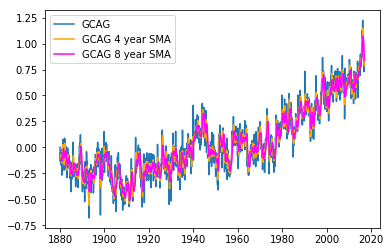

In [112]:
# moving average
# dfm['GCAG_mva'] = dfm.GCAG.rolling()
# dfm['GISTEMP_mva'] = dfm.GISTEMP.rolling()
rolling_mean = dfm.GCAG.rolling(window=4).mean()
rolling_mean2 = dfm.GCAG.rolling(window=8).mean()
plt.plot(dfm.index, dfm.GCAG, label = 'GCAG')
plt.plot(dfm.index, rolling_mean, label='GCAG 4 year SMA', color='orange')
plt.plot(dfm.index, rolling_mean2, label='GCAG 8 year SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

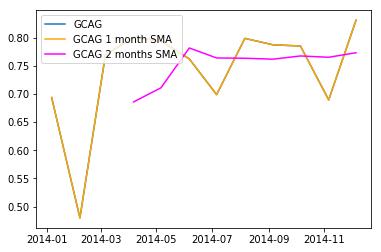

In [142]:
dfm_2016 = dfm['2014']
dfm_2016
rolling_mean = dfm_2016.GCAG.rolling(window=1).mean()
rolling_mean2 = dfm_2016.GCAG.rolling(window=4).mean()
# rolling_mean3 = dfm.GCAG.rolling(window=12).mean()
plt.plot(dfm_2016.index, dfm_2016.GCAG, label = 'GCAG')
plt.plot(dfm_2016.index, rolling_mean, label='GCAG 1 month SMA', color='orange')
plt.plot(dfm_2016.index, rolling_mean2, label='GCAG 2 months SMA', color='magenta')
# plt.plot(dfm.index, rolling_mean3, label='GCAG 12 year SMA', color='darkblue')
plt.legend(loc='upper left')
plt.show()

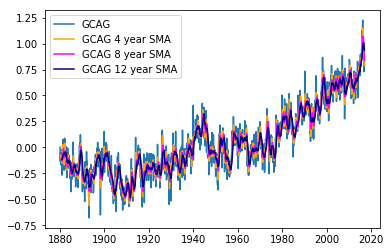

In [114]:
rolling_mean = dfm.GCAG.rolling(window=4).mean()
rolling_mean2 = dfm.GCAG.rolling(window=8).mean()
rolling_mean3 = dfm.GCAG.rolling(window=12).mean()
plt.plot(dfm.index, dfm.GCAG, label = 'GCAG')
plt.plot(dfm.index, rolling_mean, label='GCAG 4 year SMA', color='orange')
plt.plot(dfm.index, rolling_mean2, label='GCAG 8 year SMA', color='magenta')
plt.plot(dfm.index, rolling_mean3, label='GCAG 12 year SMA', color='darkblue')
plt.legend(loc='upper left')
plt.show()